In [140]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

Public repo link (under github.com/UBC-MDS):  
https://github.com/UBC-MDS/AirBNB_Luke_HanChen_573lab4  

Authors:  
Luke Yang  
HanChen Wang  
Dec 10 2022

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

1.Airbnb is a popular alternative accommodation other than hotels or inns at guest cities provided by individual renters/owners. This data set describes Airbnb's accommodation listings in New Year City in 2019. It includes metrics such as the ID and name of the listing, host's ID and name, location and neighborhood, room type, price, amount of nights minimum, last review date, number of reviews, availability etc.  

Particularly, it has our target column which is the number of review per month. This prediction helps Airbnb to identify the popular listings and help hosts to modify their listing in favour of more guests and reviews.   Thus, in this analysis, we are trying to answer the following prediction question:  

_Given the metrics of an Airbnb accommodation listing such as the location, room type, pricing, minimum nights, availability, etc, what are the predicted number of reviews per month for that listing?_

In [141]:
# 1.2 downloading and reading the dataset as a pandas dataframe.
import pandas as pd
import altair as alt
from altair_data_server import data_server

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

df = pd.read_csv('data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [142]:
# 3. preliminary preprocessing (removing nulls)
df = df.query('not reviews_per_month.isnull()')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [143]:
# Looking at the uniqueness and non-null counts of the data. 
unique_df = pd.DataFrame()
unique_df['columns'] = df.columns
unique_df['valid_count'] = df.count(axis=0).reset_index()[0]
unique_df['unique_count'] = df.nunique().reset_index()[0]
unique_df

,columns,valid_count,unique_count
0,id,38843,38843
1,name,38837,38269
2,host_id,38843,30251
3,host_name,38827,9886
4,neighbourhood_group,38843,5
5,neighbourhood,38843,218
6,latitude,38843,17443
7,longitude,38843,13641
8,room_type,38843,3
9,price,38843,581


On the large scale, this dataset contains 38843 records where the target column is not missing. It has 15 columns and the target column. After filtering on non-null targets, most of the columns do not contain `NaN`, except two columns which are listing name and host name. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [144]:
# We will split the data on a 2:8 train:test ratio
# to facilitate the speed of model building. 
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.8, random_state=573)
# feature engineer from part 4 (before EDA)
latest_day = max(pd.to_datetime(train_df["last_review"]))
train_df["days_from_last_review"] = (
     latest_day - (pd.to_datetime(train_df["last_review"]))
).dt.days

In [145]:
train_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_from_last_review
27438,21630372,Beautiful and confortable room,109146538,Marisol,Queens,Jackson Heights,40.75184,-73.88722,Private room,60,1,46,2019-07-01,2.29,1,30,7
13825,10435733,Cute Spacious Williamsburg Apt,5927655,Ann,Brooklyn,Williamsburg,40.71892,-73.95616,Private room,115,3,27,2018-10-29,0.69,1,56,252
473,166983,"3 BR, Beautiful Brooklyn Duplex",795640,Jilly,Brooklyn,Carroll Gardens,40.68252,-73.99619,Entire home/apt,350,5,6,2015-08-08,0.06,1,0,1430
46103,35081477,West Village Gem! Like Paris,196890,Siobhan,Manhattan,West Village,40.72905,-74.00294,Entire home/apt,165,2,2,2019-06-23,1.62,1,21,15
33450,26443376,Big 1BR in PRIME Bushwick! 2 blocks to L Train!,6293227,Nish,Brooklyn,Bushwick,40.70148,-73.91834,Entire home/apt,90,3,9,2019-06-01,0.74,1,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24387,19634067,"Gigantic, convenient loft in S Williamsburg!",13785996,David,Brooklyn,Williamsburg,40.70857,-73.96618,Private room,42,3,1,2018-02-14,0.06,1,0,509
34600,27435989,**Studio Apartment 20 min. From MANHATTAN **,206758830,Chris And Jocelyn,Queens,Middle Village,40.71775,-73.87488,Entire home/apt,85,2,36,2019-06-09,3.40,1,290,29
33735,26743564,Brand New Brooklyn Style Hostel RM3 #3,119669058,Melissa,Brooklyn,Bedford-Stuyvesant,40.69439,-73.95518,Shared room,36,3,14,2019-05-06,1.24,34,361,63
4106,2636643,darling small studio,13501034,Tanya,Manhattan,Upper East Side,40.78061,-73.94980,Entire home/apt,100,10,4,2015-11-06,0.06,1,0,1340


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

1. The dataset contains 15 columns and a target `reviews_per_month`. Looking at the training data, we have only two columns with small number of missing values, which are `name` and `host_name`.  

    For the `train_df.describe()` summary statistics, we report the summary of numeric-like columns. It is clear that we need to perform `StandardScaler` on these columns and perhaps discretinization for the longitude and latitude columns.  

2. For the `train_df['neighbourhood'].value_counts()` summary statistics and the `Number of Airbnb listings in neighbourhoods of New York` graph, we can see that there are 5 neighbourhood groups listed and there seems to be imbalance in the count of listings.

    For the `Correlation matrix`, we can see that `number_of_reviews`, and `availability_365` have the most **positive** correlations to target `reviews_per_month`, and `minimum_nights` has the most **negative** correlation to `reviews_per_month`. 

3. We can use R2 score for the assessment of how well our data is predicting the Number of reviews per month an Airbnb listing will have. 

In [146]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_from_last_review
27438,21630372,Beautiful and confortable room,109146538,Marisol,Queens,Jackson Heights,40.75184,-73.88722,Private room,60,1,46,2019-07-01,2.29,1,30,7
13825,10435733,Cute Spacious Williamsburg Apt,5927655,Ann,Brooklyn,Williamsburg,40.71892,-73.95616,Private room,115,3,27,2018-10-29,0.69,1,56,252
473,166983,"3 BR, Beautiful Brooklyn Duplex",795640,Jilly,Brooklyn,Carroll Gardens,40.68252,-73.99619,Entire home/apt,350,5,6,2015-08-08,0.06,1,0,1430
46103,35081477,West Village Gem! Like Paris,196890,Siobhan,Manhattan,West Village,40.72905,-74.00294,Entire home/apt,165,2,2,2019-06-23,1.62,1,21,15
33450,26443376,Big 1BR in PRIME Bushwick! 2 blocks to L Train!,6293227,Nish,Brooklyn,Bushwick,40.70148,-73.91834,Entire home/apt,90,3,9,2019-06-01,0.74,1,0,37


In [147]:
train_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_from_last_review
24387,19634067,"Gigantic, convenient loft in S Williamsburg!",13785996,David,Brooklyn,Williamsburg,40.70857,-73.96618,Private room,42,3,1,2018-02-14,0.06,1,0,509
34600,27435989,**Studio Apartment 20 min. From MANHATTAN **,206758830,Chris And Jocelyn,Queens,Middle Village,40.71775,-73.87488,Entire home/apt,85,2,36,2019-06-09,3.40,1,290,29
33735,26743564,Brand New Brooklyn Style Hostel RM3 #3,119669058,Melissa,Brooklyn,Bedford-Stuyvesant,40.69439,-73.95518,Shared room,36,3,14,2019-05-06,1.24,34,361,63
4106,2636643,darling small studio,13501034,Tanya,Manhattan,Upper East Side,40.78061,-73.94980,Entire home/apt,100,10,4,2015-11-06,0.06,1,0,1340
11381,8844652,Quiet living room in Greenpoint 1BR,34738391,Rae,Brooklyn,Greenpoint,40.73080,-73.95394,Private room,60,1,4,2016-10-23,0.09,1,0,988


In [148]:
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_from_last_review
count,7.768000e+03,7.768000e+03,7768.000000,7768.000000,7768.000000,7768.000000,7768.00000,7768.000000,7768.000000,7768.000000,7768.000000
mean,1.805075e+07,6.451151e+07,40.728054,-73.951523,142.229789,5.873326,28.90242,1.359467,5.136586,115.317199,277.415036
std,1.070566e+07,7.644186e+07,0.055116,0.046345,217.478782,15.288738,47.30435,1.623586,26.141773,129.782251,417.010951
min,5.178000e+03,2.438000e+03,40.508680,-74.244420,0.000000,1.000000,1.00000,0.010000,1.000000,0.000000,0.000000
25%,8.632134e+06,7.071581e+06,40.689068,-73.982930,68.000000,1.000000,3.00000,0.200000,1.000000,0.000000,15.000000
50%,1.871149e+07,2.767220e+07,40.721315,-73.955080,100.000000,2.000000,10.00000,0.710000,1.000000,58.000000,49.000000
75%,2.749310e+07,1.027564e+08,40.763040,-73.936577,165.000000,4.000000,32.00000,2.010000,2.000000,230.000000,364.250000
max,3.635154e+07,2.723278e+08,40.912340,-73.719280,9999.000000,365.000000,597.00000,27.950000,327.000000,365.000000,2744.000000


In [164]:
import altair as alt
numeric_features = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365",
    "days_from_last_review"
]
alt.Chart(train_df).mark_bar().encode(
    x=alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=30)),
    y=alt.Y("count()")
).properties(
    width=300,
    height=200
).repeat(
    numeric_features,
    columns=2
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [165]:
categorical_features = [
    "neighbourhood_group",
    "room_type",
]
alt.Chart(train_df).mark_bar().encode(
    x=alt.X(alt.repeat(), type='nominal', sort='-y'),
    y=alt.Y("count()")
).properties(
    width=300,
    height=200
).repeat(
    categorical_features,
    columns=2
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [151]:
alt.Chart(train_df).mark_circle(size=6).encode(
    y=alt.Y("latitude:Q", scale=alt.Scale(zero=False)),
    x=alt.X("longitude:Q", scale=alt.Scale(zero=False)),
    color=alt.Color("neighbourhood_group:N")
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [153]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7768 entries, 27438 to 11381
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7768 non-null   int64  
 1   name                            7768 non-null   object 
 2   host_id                         7768 non-null   int64  
 3   host_name                       7765 non-null   object 
 4   neighbourhood_group             7768 non-null   object 
 5   neighbourhood                   7768 non-null   object 
 6   latitude                        7768 non-null   float64
 7   longitude                       7768 non-null   float64
 8   room_type                       7768 non-null   object 
 9   price                           7768 non-null   int64  
 10  minimum_nights                  7768 non-null   int64  
 11  number_of_reviews               7768 non-null   int64  
 12  last_review                  

In [154]:
# Correlation matrix
# We can see that number_of_reviews and availability_365 have the highest positve correlation to target reviews_per_month. 
# and minimum_nights has the most negative correlation to reviews_per_month. 
train_df.corr('spearman').style.format(precision=2).background_gradient()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_from_last_review
id,1.00,0.57,-0.01,0.07,-0.04,-0.16,-0.30,0.37,0.08,0.08,-0.36
host_id,0.57,1.00,0.03,0.11,-0.10,-0.18,-0.12,0.26,0.11,0.12,-0.20
latitude,-0.01,0.03,1.00,0.04,0.11,0.02,-0.02,-0.03,-0.02,-0.03,0.05
longitude,0.07,0.11,0.04,1.00,-0.41,-0.12,0.07,0.10,0.08,0.07,-0.08
price,-0.04,-0.10,0.11,-0.41,1.00,0.12,-0.02,-0.02,-0.16,0.07,-0.02
minimum_nights,-0.16,-0.18,0.02,-0.12,0.12,1.00,-0.14,-0.26,0.01,0.05,0.16
number_of_reviews,-0.30,-0.12,-0.02,0.07,-0.02,-0.14,1.00,0.70,0.08,0.29,-0.50
reviews_per_month,0.37,0.26,-0.03,0.10,-0.02,-0.26,0.70,1.00,0.14,0.39,-0.80
calculated_host_listings_count,0.08,0.11,-0.02,0.08,-0.16,0.01,0.08,0.14,1.00,0.37,-0.14
availability_365,0.08,0.12,-0.03,0.07,0.07,0.05,0.29,0.39,0.37,1.00,-0.47


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In [155]:

from sklearn.preprocessing import KBinsDiscretizer

discretization_feats = ["latitude", "longitude"]

# I will add this code in the preprocessor section below. 
# KBinsDiscretizer(n_bins=20, encode="onehot"), discretization_feats

# I will also add a new column called 'days_from_last_review'
# this feature calculates the timespan from the last review
# may be potentially helpful when predictive the review rate

# latest_day = max(pd.to_datetime(train_df["last_review"]))
# train_df["days_from_last_review"] = (
#      latest_day - (pd.to_datetime(train_df["last_review"]))
# ).dt.days

test_df["days_from_last_review"] = (
   latest_day - (pd.to_datetime(test_df["last_review"])) 
).dt.days

alt.Chart(train_df, title="Distribution of days from last review").mark_bar().encode(
    x=alt.X("days_from_last_review:N", title="Days from last review", bin=alt.Bin(maxbins=30)),
    y=alt.Y("count()", title="Count of listings")
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [156]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_from_last_review
27438,21630372,Beautiful and confortable room,109146538,Marisol,Queens,Jackson Heights,40.75184,-73.88722,Private room,60,1,46,2019-07-01,2.29,1,30,7
13825,10435733,Cute Spacious Williamsburg Apt,5927655,Ann,Brooklyn,Williamsburg,40.71892,-73.95616,Private room,115,3,27,2018-10-29,0.69,1,56,252
473,166983,"3 BR, Beautiful Brooklyn Duplex",795640,Jilly,Brooklyn,Carroll Gardens,40.68252,-73.99619,Entire home/apt,350,5,6,2015-08-08,0.06,1,0,1430
46103,35081477,West Village Gem! Like Paris,196890,Siobhan,Manhattan,West Village,40.72905,-74.00294,Entire home/apt,165,2,2,2019-06-23,1.62,1,21,15
33450,26443376,Big 1BR in PRIME Bushwick! 2 blocks to L Train!,6293227,Nish,Brooklyn,Bushwick,40.70148,-73.91834,Entire home/apt,90,3,9,2019-06-01,0.74,1,0,37


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [157]:
X_train, y_train = (
    train_df.drop(columns=["reviews_per_month"]),
    train_df["reviews_per_month"],
)
X_test, y_test = (
    test_df.drop(columns=["reviews_per_month"]),
    test_df["reviews_per_month"],
)

In [158]:
train_df.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'days_from_last_review']

In [159]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_features = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365",
    "days_from_last_review"
]
categorical_features = [
    "neighbourhood_group",
    "neighbourhood",
    "room_type",
]
discretization_features = ["latitude", "longitude"]
drop = [
    "id",
    "last_review",
    "host_id",
    "host_name",
    "name"
]

preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler(), SimpleImputer(strategy="most_frequent")), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    (KBinsDiscretizer(n_bins=30, encode="onehot"), discretization_feats),
    ("drop", drop),
)

preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['price', 'minimum_nights',
                                  'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365',
                                  'days_from_last_review']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['neighbourhood_group', 'neighbourhood',
                                  'room_type']),
                                ('kbinsdiscretizer',
                                 KBinsDiscretizer(n_bins=30),
                                 ['latitude', 'longitude']),
                                ('drop', 'drop',
                                 ['id', 'last_review', 'host_id', 'host_name',
                                  'name'])])

In [160]:
# This line nicely formats the feature names from `preprocessor.get_feature_names_out()`
# so that we can more easily use them below
preprocessor.verbose_feature_names_out = False
# Create a dataframe with the transformed features and column names
preprocessor.fit(X_train)

# transformed data
X_train_transformed = preprocessor.transform(X_train)
ohe_features = (
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)

discretization_features = (
    preprocessor.named_transformers_["kbinsdiscretizer"].get_feature_names_out().tolist()
)

# Code to get all the feature names
feature_names = numeric_features + ohe_features + discretization_features

X_train_enc = pd.DataFrame(X_train_transformed, columns=feature_names)

# Show the transformed data
X_train_enc.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,days_from_last_review,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,longitude_20.0,longitude_21.0,longitude_22.0,longitude_23.0,longitude_24.0,longitude_25.0,longitude_26.0,longitude_27.0,longitude_28.0,longitude_29.0
0,-0.378129,-0.318773,0.361461,-0.158247,-0.657430,-0.648502,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.125215,-0.187950,-0.040219,-0.158247,-0.457081,-0.060950,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.955420,-0.057126,-0.484182,-0.158247,-0.888601,2.764098,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.104708,-0.253361,-0.568746,-0.158247,-0.726781,-0.629317,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.240176,-0.187950,-0.420758,-0.158247,-0.888601,-0.576557,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [161]:
X_train_enc.shape

(7768, 263)

In [162]:
from catboost import CatBoostRegressor
pipe_cat = make_pipeline(preprocessor,CatBoostRegressor(verbose=False))
pipe_cat.fit(X_train, y_train)
pipe_cat.score(X_test, y_test)

0.6518976223188482

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [60]:
# Code from Varada, DSCI 573, UBC Master of Data Science course
from sklearn.model_selection import cross_validate
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [61]:
from sklearn.dummy import DummyRegressor
from collections import defaultdict

cross_val_results = {}
cross_val_results["Dummy"] = mean_std_cross_val_scores(
    make_pipeline(preprocessor, DummyRegressor()), X_train, y_train, return_train_score=True
)
pd.DataFrame(cross_val_results)

,Dummy
fit_time,0.032 (+/- 0.005)
score_time,0.013 (+/- 0.001)
test_score,-0.001 (+/- 0.001)
train_score,0.000 (+/- 0.000)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [62]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV

cross_val_results["Ridge"] = mean_std_cross_val_scores(
    make_pipeline(preprocessor, Ridge()), X_train, y_train, return_train_score=True
)
pd.DataFrame(cross_val_results)

,Dummy,Ridge
fit_time,0.032 (+/- 0.005),0.052 (+/- 0.005)
score_time,0.013 (+/- 0.001),0.015 (+/- 0.001)
test_score,-0.001 (+/- 0.001),0.395 (+/- 0.038)
train_score,0.000 (+/- 0.000),0.439 (+/- 0.010)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

2. The `RandomForest` model is the most overfitted model. It has a very high score in the training set but a large gap between the training score and the test score. `LGBMR`, and `CatBoost` as improved ensemble model are the less overfitted compared to `RandomForest`. Performance-wise, we would choose these two models over the `RandomForest` model.
    `SVR` and `Ridge` seem to be underfitted. The scores are not very good but the training score and the test score are roughly the same. Even though the ensemble models are overfitting they still have higher test scores than `SVR` and `Ridge`.

In [63]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor

cross_val_results["Random Forests"] = mean_std_cross_val_scores(
    make_pipeline(preprocessor, RandomForestRegressor(n_jobs=-1, random_state=573)),
    X_train,
    y_train,
    return_train_score=True,
)

cross_val_results["SVR"] = mean_std_cross_val_scores(
    make_pipeline(preprocessor, SVR()),
    X_train,
    y_train,
    return_train_score=True,
)

cross_val_results["LGBMR"] = mean_std_cross_val_scores(
    make_pipeline(preprocessor, LGBMRegressor(random_state=573)),
    X_train,
    y_train,
    return_train_score=True,
)

cross_val_results["CatBoost"] = mean_std_cross_val_scores(
    make_pipeline(preprocessor, CatBoostRegressor(verbose=False,random_state=573)),
    X_train,
    y_train,
    return_train_score=True,
)

pd.DataFrame(cross_val_results)

KeyboardInterrupt: 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

As shown in the cross validation results table below, `RFECV` did not improve the train or test score. Thus, we will not used this reduced model for the next step. 

In [163]:
from sklearn.feature_selection import RFECV
cross_val_results["CatBoost_rfe"] = mean_std_cross_val_scores(
    make_pipeline(
        preprocessor,
        RFECV(Ridge(), cv=10),
        CatBoostRegressor(verbose=False, random_state=573),
    ),
    X_train,
    y_train,
    return_train_score=True,
)
pd.DataFrame(cross_val_results)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [78]:
import numpy as np
param_grid = {
    "catboostregressor__learning_rate": np.arange(0.01,0.1,0.02),
    "catboostregressor__max_depth": np.arange(4,10,1)
}

from sklearn.model_selection import GridSearchCV
pipe_cat = make_pipeline(preprocessor, CatBoostRegressor(verbose=False, random_state=573))

grid_search = GridSearchCV(
    pipe_cat, 
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)
grid_search.fit(X_train, y_train)
grid_search.best_score_

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'catboostregressor__learning_rate': 0.03, 'catboostregressor__max_depth': 7}

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [ ]:
# Generate a table showing feature importances.
feat_importance = grid_search.best_estimator_.named_steps["catboostregressor"].feature_importances_

# Code to get all the feature names
feature_names = numeric_features + ohe_features + discretization_features

pd.DataFrame({"Feature": feature_names, "Feature Importance": feat_importance}).sort_values(
    by="Feature Importance", ascending=False
)

,Feature,Feature Importance
5,days_from_last_review,34.303656
2,number_of_reviews,23.786181
1,minimum_nights,14.114188
4,availability_365,8.056145
0,price,3.354929
...,...,...
128,neighbourhood_Navy Yard,0.000000
129,neighbourhood_Neponsit,0.000000
130,neighbourhood_New Brighton,0.000000
134,neighbourhood_North Riverdale,0.000000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

1. The code below shows the best-performing model's score on the test set.
2. Yes, the test score is slightly better than the cross-validation score. The test set is partitioned relatively large; thus the result could be trusted. I do not think the optimization bias is influencing the results as we are using a reasonably large search range and the large test set's score is better than the validation score.

In [ ]:
grid_search.score(X_test, y_test)

0.2615449829795453

In [ ]:
import shap
shap.initjs()
pipe_cat = make_pipeline(preprocessor, CatBoostRegressor(verbose=False,
                                                         max_depth=9,
                                                         learning_rate=0.03,
                                                         random_state=573))
pipe_cat.fit(X_train, y_train)

X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

cat_explainer = shap.TreeExplainer(pipe_cat["catboostregressor"])
test_cat_shap_values = cat_explainer.shap_values(X_test_enc)

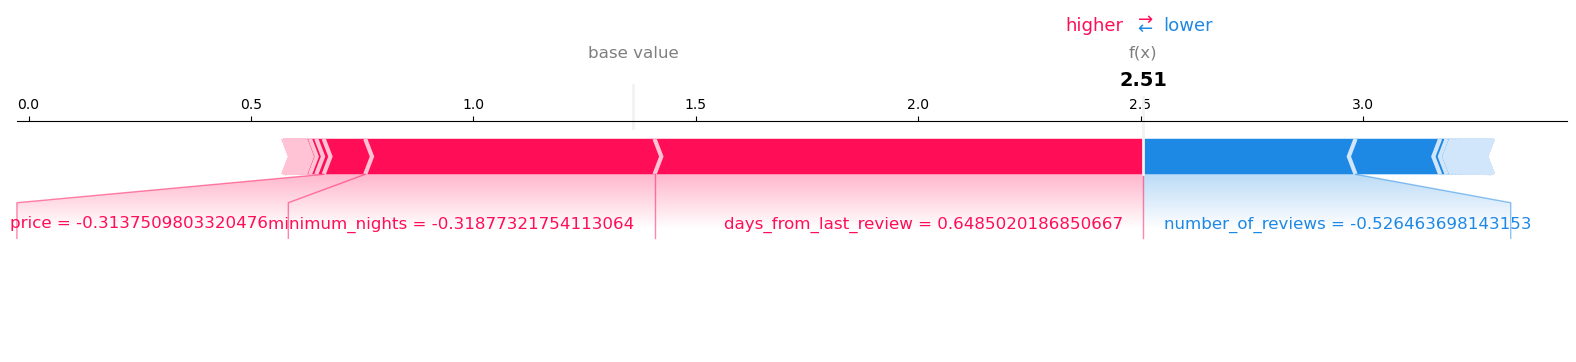

In [ ]:
shap.force_plot(
    cat_explainer.expected_value,
    test_cat_shap_values[123, :],
    X_test_enc.iloc[123, :],
    matplotlib = True
)

In [ ]:

pipe_cat.predict(pd.DataFrame(X_test_enc.iloc[123, :]).T)

KeyError: "None of [Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')] are in the [columns]"

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,days_from_last_review,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,longitude_20.0,longitude_21.0,longitude_22.0,longitude_23.0,longitude_24.0,longitude_25.0,longitude_26.0,longitude_27.0,longitude_28.0,longitude_29.0
41596,-0.313751,-0.318773,-0.526464,-0.158247,-0.888601,0.648502,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test[123]

0.23

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

1. 
| Model      | Description | Score   | Complexity | 
| ---        |    ----   |          --- |---|
| DummyRegressor      | Baseline Model       | 1   |Low|
| Ridge  | Linear Model with L2 Regularization        | 1     |Low|
| SVR      | Support Vector Machines Regressor   | 1   |Medium|
| Random Forest Regressor  | Tree Based Ensemble Model with Randomness  | 1   | Medium|
| Catboost Regressor      | Tree Based Ensemble Boosting Model   | 1  | High |
| Catboost Regressor  (Tuned)   | Tree Based Ensemble Boosting Model with Hyperparameter Optimization   | 1  | High |
| Catboost Regressor RFE  | Catboosting Model with Feature Selection  | 1   | Medium |

In [ ]:
cross

2. We gathered the AirBnB data and aim to construct a predictive model that estimates the number of reviews per month. We preprocessed the data using `OneHotEncoder` and `StandardScaler` on categorical and numerical data. Additionally, we engineered a potentially helpful feature that indicates the time span since the last review. We achieve the best score of () using the processed data and `CatBoostRegressor` with a learning rate of 0.3 and a maximum tree depth of 8. While the high-performing boosting model is complex to interpret, we can cooperate `SHAP` as the tool to visualize and explain the decision of the model upon new cases.

3. The potential of some simpler models has not been fully explored. It is still possible that `SVR` and `Ridge` can achieve a higher score after hyperparameter optimization. In particular, if simpler models like `Ridge` can be tuned up to similar performance as `CatBoostRegressor`, we should choose `Ridge` over `CatBoostRegressor` for improved interpretability.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

As a continuation of the DSCI 571 course, we learned how to carry out a supervised machine learning project from EDA, preprocessing, feature engineering and transformation, model building, model selection, feature selection, and presentation and interpretation of results for both classification and regression data sets. I personally am amazed by the number of different models out there and especially the ensemble model that can take the good parts of different models into one. 

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: